In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.1
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [3]:
# 使用Linux命令
!ls

chapter_2
tf01_keras_classification_model.ipynb
tf02_keras_classification_model-normalize.ipynb
tf03_keras_classification_model-callbacks.ipynb
tf2.ipynb


In [4]:
!pwd

/home/yf/py_warehouse/day44


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [6]:
# 通过原有sklearn的标准化进行处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784] -> [None, 28, 28]
# 先reshape变为二维（相当于1列）的目的是对每一个像素点进行标准化（让其等价）
x_train_scaled = scaler.fit_transform(
    x_train.reshape(-1, 1)).reshape(-1, 28, 28)
# 这个是验证集，验证集用的也是训练集的均值和方差
x_valid_scaled = scaler.transform(
    x_valid.reshape(-1, 1)).reshape(-1, 28, 28)
# 这个是测试集
x_test_scaled = scaler.transform(
    x_test.reshape(-1, 1)).reshape(-1, 28, 28)

In [8]:
# tf.keras.models.Sequential()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

"""
与上面的代码等价
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [10]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
    
# 模型保存路径
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),  # 画图使用
    keras.callbacks.ModelCheckpoint(output_model_file,  # 保存模型的最佳参数
                                    save_best_only = True),
    # 可以继续调小min_delta，默认监控的指标是验证集的monitor='val_loss'
    # 如果连续5次val_loss小于0.01，停止训练
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

2022-07-20 00:02:16.362635: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3209 - accuracy: 0.8866 - val_loss: 0.3517 - val_accuracy: 0.8756
Epoch 2/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3180 - accuracy: 0.8877 - val_loss: 0.3499 - val_accuracy: 0.8768
Epoch 3/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8891 - val_loss: 0.3439 - val_accuracy: 0.8768
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3125 - accuracy: 0.8900 - val_loss: 0.3436 - val_accuracy: 0.8756
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3100 - accuracy: 0.8898 - val_loss: 0.3427 - val_accuracy: 0.8784
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3075 - accuracy: 0.8916 - val_loss: 0.3415 - val_accuracy: 0.8788
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3051 - accuracy: 0.8924 - val_loss: 0.3364 - val_ac

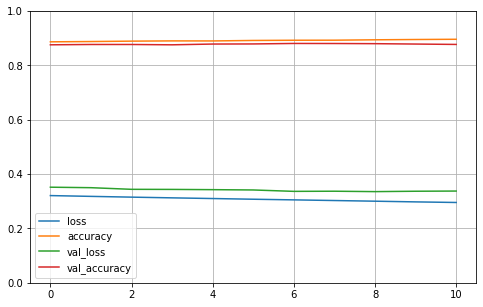

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [13]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.37006503343582153, 0.8679999709129333]